In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv('task_file.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [32]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [34]:
df = df.drop(['Sub-product', 'ZIP code', 'Date received','Company public response'], axis=1)

In [35]:
df= df.dropna(subset=['State'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 98
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       98 non-null     object
 1   Consumer complaint narrative  16 non-null     object
 2   Company                       98 non-null     object
 3   State                         98 non-null     object
 4   Submitted via                 98 non-null     object
 5   Company response to consumer  98 non-null     object
 6   Timely response?              98 non-null     object
 7   Consumer disputed?            75 non-null     object
dtypes: object(8)
memory usage: 6.9+ KB


In [37]:
status='mid'
df['Consumer disputed?'] = df['Consumer disputed?'].fillna(status)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 98
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       98 non-null     object
 1   Consumer complaint narrative  16 non-null     object
 2   Company                       98 non-null     object
 3   State                         98 non-null     object
 4   Company response to consumer  98 non-null     object
 5   Timely response?              98 non-null     object
 6   Consumer disputed?            98 non-null     object
dtypes: object(7)
memory usage: 6.1+ KB


In [38]:
df


,Product,Consumer complaint narrative,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,Mortgage,NaN,M&T BANK CORPORATION,MI,Referral,Closed with explanation,Yes,No
1,Student loan,When my loan was switched over to Navient i wa...,"Navient Solutions, LLC.",LA,Web,Closed with explanation,Yes,No
2,Credit card or prepaid card,I tried to sign up for a spending monitoring p...,CAPITAL ONE FINANCIAL CORPORATION,VA,Web,Closed with explanation,Yes,mid
3,Credit card,NaN,AMERICAN EXPRESS COMPANY,ID,Web,Closed with explanation,Yes,Yes
4,Debt collection,NaN,"CITIBANK, N.A.",VA,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...
94,Money transfers,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,Web,Closed with monetary relief,Yes,No
95,Mortgage,NaN,NATIONSTAR MORTGAGE,DE,Web,Closed with explanation,Yes,No
96,"Money transfer, virtual currency, or money ser...",NaN,"CCI Financial, Inc",CA,Web,Closed with explanation,Yes,mid
97,Credit reporting,NaN,Experian Information Solutions Inc.,FL,Web,Closed with non-monetary relief,Yes,No


In [39]:
distinct_state_count = df['State'].nunique()
distinct_state_count

34

In [40]:
distinct_product_count = df['Product'].nunique()
distinct_product_count

11

In [42]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Product'] = lb.fit_transform(df['Product'])
df['State'] = lb.fit_transform(df['State'])
df['Company response to consumer'] = lb.fit_transform(df['Company response to consumer'])
df['Timely response?'] = lb.fit_transform(df['Timely response?'])
df['Submitted via'] = lb.fit_transform(df['Submitted via'])
df['Consumer disputed?'] = lb.fit_transform(df['Consumer disputed?'])
df

,Product,Consumer complaint narrative,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,9,NaN,M&T BANK CORPORATION,14,3,0,0,0
1,10,When my loan was switched over to Navient i wa...,"Navient Solutions, LLC.",10,4,0,0,0
2,3,I tried to sign up for a spending monitoring p...,CAPITAL ONE FINANCIAL CORPORATION,30,4,0,0,2
3,2,NaN,AMERICAN EXPRESS COMPANY,7,4,0,0,1
4,6,NaN,"CITIBANK, N.A.",30,4,0,0,1
...,...,...,...,...,...,...,...,...
94,8,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,14,4,1,0,0
95,9,NaN,NATIONSTAR MORTGAGE,3,4,0,0,0
96,7,NaN,"CCI Financial, Inc",1,4,0,0,2
97,4,NaN,Experian Information Solutions Inc.,4,4,2,0,0


**EDA**

**4.How successful company is to resolve the complaints? **

In [24]:
df['Consumer disputed?'].value_counts()

0    56
2    23
1    19
Name: Consumer disputed?, dtype: int64

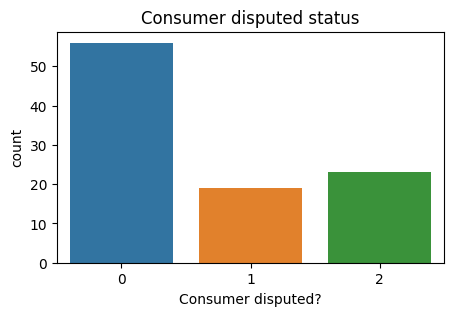

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Consumer disputed?')
plt.title('Consumer disputed status')
plt.show()

In [ ]:
Timely_response= pd.crosstab(df['Timely response?'], df['Consumer disputed?'])
print(Timely_response)

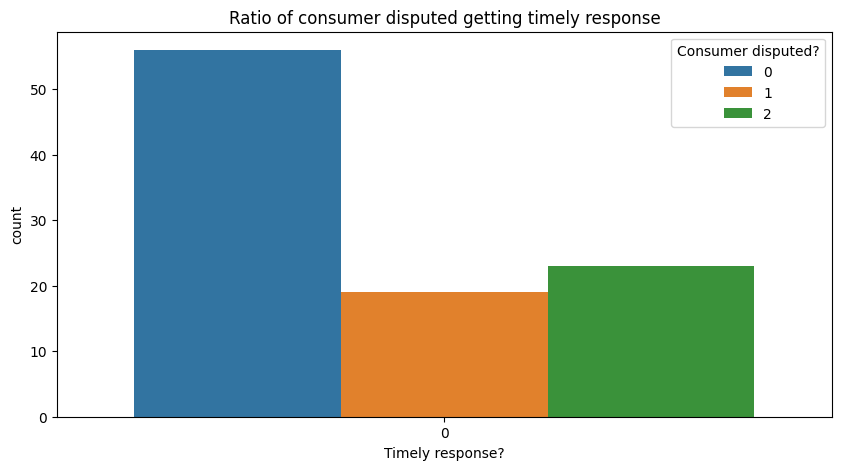

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Timely response?', hue='Consumer disputed?')
plt.title('Ratio of consumer disputed getting timely response')
plt.show()

In [43]:
print(df['Submitted via'].value_counts())

4    72
3    17
1     3
0     3
2     3
Name: Submitted via, dtype: int64


**From which sources most complaints are coming?**

In [46]:
Sources_of_submission = pd.crosstab(df['Submitted via'], df['Consumer disputed?'])
print(Sources_of_submission)

Consumer disputed?   0   1   2
Submitted via                 
0                    1   1   1
1                    3   0   0
2                    3   0   0
3                   12   5   0
4                   37  13  22


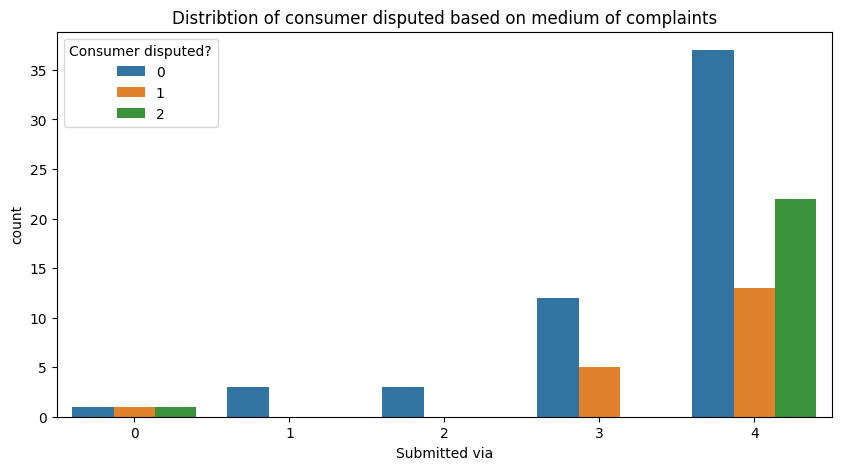

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Submitted via', hue='Consumer disputed?')
plt.title('Distribtion of consumer disputed based on medium of complaints')
plt.show()

**what are top 5 states from where the most complaints are coming?**

In [53]:
top_states = df['State'].value_counts().head(5)
top_states

1     15
4      9
29     8
5      6
12     5
Name: State, dtype: int64

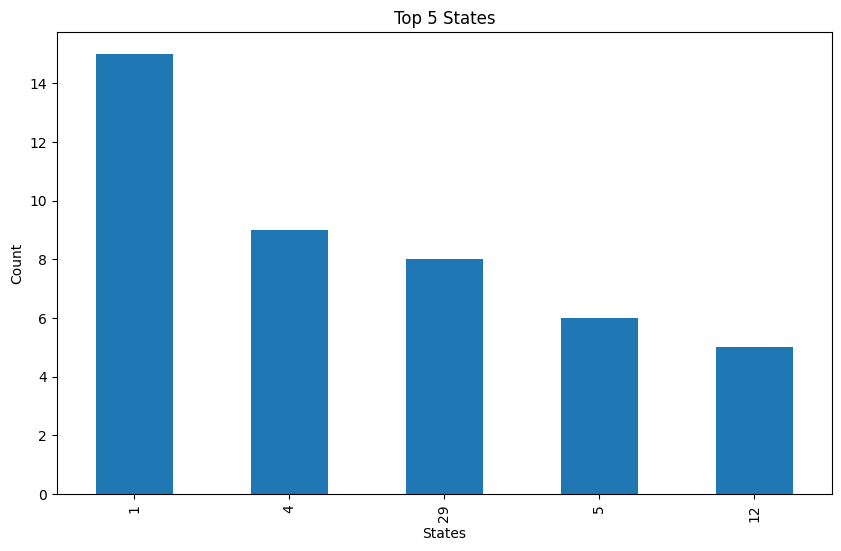

In [54]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
top_states.plot(kind='bar')
plt.title('Top 5 States')
plt.xlabel('States')
plt.ylabel('Count')
plt.show()

**Five Business Questions**
1.From which sources most complaints are coming?
2.what are top 5 states from where the most complaints are coming?
3.Customers of which financial service are doing the most complaints? (classification K-NN, SVM)
4.How successful company is to resolve the complaints?
5 Which comapny's customers are doing the most complaints?